# A single Resonator coupled to a feedline

Authors: Kelvin Ramos


In [1]:
# Import useful packages
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
from qiskit_metal.qlibrary.core import QComponent
from collections import OrderedDict


# simple design
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.terminations.launchpad_wb_driven import LaunchpadWirebondDriven
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround

# Analysis
from qiskit_metal.analyses.quantization import EPRanalysis
from qiskit_metal.analyses.simulation import ScatteringImpedanceSim
from qiskit_metal.analyses.sweep_and_optimize.sweeping import Sweeping
import pyEPR as epr

# Set up the design

In [2]:
# Set up chip dimensions 
design = designs.DesignPlanar()
design._chips['main']['size']['size_x'] = '4mm'
design._chips['main']['size']['size_y'] = '4mm'
design._chips['main']['size']['size_z'] = '-200um'
# Resonator and feedline gap width (W) and center conductor width (S) from reference 2
design.variables['cpw_width'] = '20um' #S from reference 2
design.variables['cpw_gap'] = '11um' #W from reference 2


design.overwrite_enabled = True

hfss = design.renderers.hfss

# Open GUI
gui = MetalGUI(design)

In [3]:
#design.chips

In [4]:
# Define for renderer
eig_qres = EPRanalysis(design, "hfss")
hfss = design.renderers.hfss
hfss = eig_qres.sim.renderer
q3d = design.renderers.q3d

# Define the geometry

Here we will have a single feedline couple to a single CPW resonator (quarter wavelenght).


In [18]:
###################
# Single feedline # 
###################

# Driven Lauchpad 1
x1 = '1.0mm'
y1 = '2.0mm'

general=Dict(chip='main', lead_length='30um', trace_width='20um', trace_gap='11um',
            pad_width='120um', pad_gap='65um', taper_height='150um')


LP1 = LaunchpadWirebondDriven(design, 'LP1', options = Dict(pos_x=x1, pos_y=y1, orientation='360', **general))

# Driven Launchpad 2
x2 = '3.0mm'
y2 = '2.0mm'


LP2 = LaunchpadWirebondDriven(design, 'LP2', options = Dict(pos_x=x2, pos_y=y2, orientation='180', **general))

# Using path finder to connect the two launchpads
# Using path finder to connect the two launchpads

                            
linea = RoutePathfinder(design, 'linea', options = Dict(chip='main', trace_width ='20um',
        trace_gap ='11um',  fillet='0um', hfss_wire_bonds = False,
                                            lead=Dict(end_straight='0.2mm'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='LP1',
                                                    pin='tie'),
                                                end_pin=Dict(
                                                    component='LP2',
                                                    pin='tie')
                                            )))


# Rebuild the GUI
gui.rebuild()
gui.autoscale()

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)



In [19]:
######################
# lambda/4 resonator #
######################

# First we define the two end-points
otg1 = OpenToGround(design, 'otg1', 
                    options=Dict(chip='main', pos_x='1.9mm',  pos_y='1.948mm', 
                                 orientation='180', width='20um', gap='11um',
                                termination_gap='11um'))
otg2 = ShortToGround(design, 'otg2', options=Dict(chip='main', pos_x='2.5mm',  pos_y='1mm', orientation='0'))

# Use RouteMeander to fix the total length of the resonator
meandro = RouteMeander(design, 'meandro',  options=Dict(chip='main',
        trace_width ='cpw_width',
        trace_gap ='11um',
        total_length='5mm',
        hfss_wire_bonds = False,
        fillet='0 um',
        lead = Dict(start_straight='0.5um', end_straight='200um'),
        meander=Dict(spacing='230um', asymmetry='0um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg1', pin='open'),
            end_pin=Dict(component='otg2', pin='short')), ))

# rebuild the GUI
gui.rebuild()
gui.autoscale()

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)



In [20]:
otg1.options

{'pos_x': '1.9mm',
 'pos_y': '1.948mm',
 'orientation': '180',
 'chip': 'main',
 'layer': '1',
 'width': '20um',
 'gap': '11um',
 'termination_gap': '11um'}

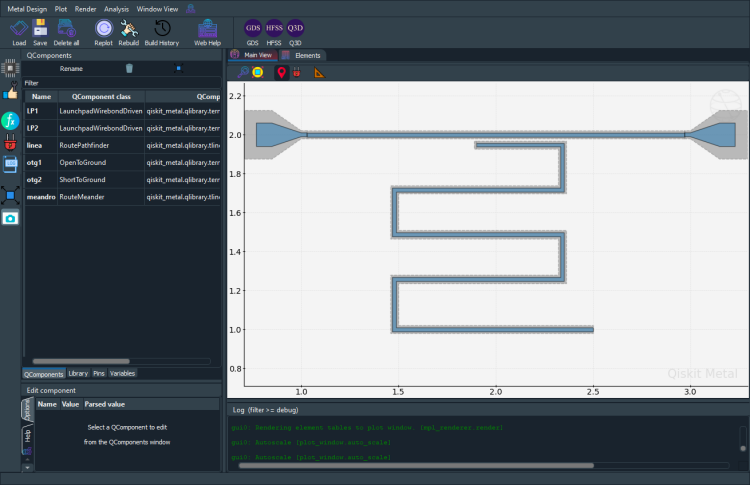

In [21]:
gui.autoscale()
gui.screenshot()

# EigenValue

In [9]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_qres = EPRanalysis(design, "hfss")

In [10]:
hfss = eig_qres.sim.renderer

In [189]:
hfss.start()

INFO 12:03AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:03AM [load_ansys_project]: 	Opened Ansys App
INFO 12:03AM [load_ansys_project]: 	Opened Ansys Desktop v2018.0.0
INFO 12:03AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Quantum Circuits IB/Documents/Kelvin/
	Project:   Project1
INFO 12:03AM [connect_design]: 	Opened active design
	Design:    resonador_v3 [Solution type: DrivenModal]
INFO 12:03AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssDMSetup'>)
INFO 12:03AM [connect]: 	Connected to project "Project1" and design "resonador_v3" 😀 



True

In [190]:
hfss.activate_ansys_design("resonador2", 'eigenmode')  # use new_ansys_design() to force creation of a blank design

12:03AM 06s WARNING [activate_ansys_design]: The design_name=resonador2 was not in active project.  Designs in active project are: 
['resonador_v3'].  A new design will be added to the project.  
INFO 12:03AM [connect_design]: 	Opened active design
	Design:    resonador2 [Solution type: Eigenmode]
WARNING 12:03AM [connect_setup]: 	No design setup detected.
WARNING 12:03AM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:03AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [191]:
hfss.render_design([], [])

In [192]:
# Analysis properties
setup = hfss.pinfo.setup
setup.n_modes = 2
setup.passes = 15
pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '10 nH')
pinfo.design.set_variable('Cj', '0 fF')

setup.analyze()

INFO 12:03AM [analyze]: Analyzing setup Setup


com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024349), None)

In [19]:
eig_qres.sim.convergence_t, eig_qres.sim.convergence_f, _ = hfss.get_convergences()
eig_qres.sim.plot_convergences()

06:06PM 20s INFO [get_f_convergence]: Saved convergences to C:\Users\Quantum Circuits IB\Documents\Kelvin\Qmetal_install\qiskit-metal\my_works\hfss_eig_f_convergence.csv


# Scattering Analysis

In [40]:
from qiskit_metal.analyses.simulation import ScatteringImpedanceSim
em1 = ScatteringImpedanceSim(design, "hfss")

In [48]:
design_name= "Sweep_DrivenModal"
qcomp_render = [] # Means to render everything in qgeometry table.
open_terminations = []

# Here, pin LP1_in and LP2_in are converted into lumped ports,
#           each with an impedance of 50 Ohms. <br>
port_list = [('LP1', 'in', 50),
             ('LP2', 'in', 50)]
box_plus_buffer = True

In [49]:
# we use HFSS as rendere
hfss = em1.renderer
hfss.start()

INFO 11:25PM [connect_project]: Connecting to Ansys Desktop API...
INFO 11:25PM [load_ansys_project]: 	Opened Ansys App
INFO 11:25PM [load_ansys_project]: 	Opened Ansys Desktop v2018.0.0
INFO 11:25PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Quantum Circuits IB/Documents/Kelvin/
	Project:   resonador
INFO 11:25PM [connect_design]: 	Opened active design
	Design:    Resonator_v5 [Solution type: DrivenModal]
INFO 11:25PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssDMSetup'>)
INFO 11:25PM [connect]: 	Connected to project "resonador" and design "Resonator_v5" 😀 



True

In [50]:
# Here we activate the design for a drivenmodal solution
hfss.activate_ansys_design("Resonator_v6", 'drivenmodal')
setup_args = Dict(max_delta_s=0.15, freq_ghz=5)
setup_args.name = 'Setup'
hfss.edit_drivenmodal_setup(setup_args)

11:25PM 14s WARNING [activate_ansys_design]: The design_name=Resonator_v6 was not in active project.  Designs in active project are: 
['Resonator_v2', 'Resonator_v3', 'Resonator_v4', 'Resonator_v5'].  A new design will be added to the project.  
INFO 11:25PM [__del__]: Disconnected from Ansys HFSS
INFO 11:25PM [__del__]: Disconnected from Ansys HFSS
INFO 11:25PM [__del__]: Disconnected from Ansys HFSS
INFO 11:25PM [connect_design]: 	Opened active design
	Design:    Resonator_v6 [Solution type: DrivenModal]
WARNING 11:25PM [connect_setup]: 	No design setup detected.
WARNING 11:25PM [connect_setup]: 	Creating driven modal default setup.
INFO 11:25PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssDMSetup'>)
11:25PM 14s WARNING [edit_drivenmodal_setup]: In setup_args, key=max_delta_s, value=0.15 is not in pinfo.setup, the key/value pair from setup_args not added to Setup in Ansys.
11:25PM 14s WARNING [edit_drivenmodal_setup]: The value for freq_ghz should be an float. The pre

In [51]:
# set buffer
hfss.options['x_buffer_width_mm'] = 0.1
hfss.options['y_buffer_width_mm'] = 0.1
#hfss.options

In [52]:
# render the design
hfss.render_design(selection=[], 
                   open_pins=open_terminations, 
                   port_list=port_list, 
                   box_plus_buffer = box_plus_buffer)

In [53]:
# for acurate simulations, make sure the mesh is fine enough for the meander
hfss.modeler.mesh_length(
                'cpw_mesh',
                ['trace_meandro'],
                MaxLength='0.001mm')

# Broad sweet to find the resonance

In [54]:
hfss.add_sweep(setup_name="Setup", 
               name="Sweep", 
               start_ghz=5.5,
               stop_ghz=6.5,
               count=2000,
               type="Fast")

INFO 11:25PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssDMSetup'>)


In [39]:
hfss.analyze_sweep('Sweep', 'Setup')

INFO 12:53AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssDMSetup'>)
INFO 12:53AM [analyze]: Analyzing setup Setup : Sweep


In [18]:
hfss.plot_params(['S11', 'S21'])

ValueError: 'S[1,1]_Re' is not in list

In [19]:
# extract the S21 parameters
freqs, Pcurves, Pparams = hfss.get_params(['S21'])

ValueError: 'S[2,1]_Re' is not in list

In [32]:
# find armin 
f_res = freqs[np.argmin(np.abs(Pparams.S21.values))]
f_res

NameError: name 'freqs' is not defined

# Narrow sweep around the resonance found above

In [ ]:
#fine sweep
hfss.add_sweep(setup_name="Setup", 
               name="Sweep_narrow", 
               start_ghz=np.round(f_res/1e9,3)-0.01,
               stop_ghz=np.round(f_res/1e9,3)+0.01,
               count=1001,
               type="Fast") #slow but precise

In [ ]:
hfss.analyze_sweep('Sweep_narrow', 'Setup')

In [ ]:
hfss.plot_params(['S11', 'S21'])

# Close connections

In [57]:
em1.close()

Warning! 3 COM references still alive
Ansys will likely refuse to shut down


In [58]:
hfss.disconnect_ansys()

Warning! 3 COM references still alive
Ansys will likely refuse to shut down


In [24]:
gui.main_window.close()

True

In [39]:
close()

NameError: name 'close' is not defined